### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from numpy import linalg

In [4]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)

In [5]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [6]:
# clean data
print(Hitters.shape)
Hitters = Hitters.dropna()

(322, 21)


In [7]:
Hitters.shape

(263, 21)

In [8]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [31]:
# converting categorical data into dummy variable
Hitters_1 = pd.get_dummies(Hitters, drop_first=True, columns=['League', 'Division', 'NewLeague'])
Hitters_1.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,475.0,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,480.0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,500.0,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,91.5,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,750.0,0,1,0


### Ridge Regression

In [11]:
from sklearn.linear_model import Ridge

In [12]:
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary

In [33]:
# standardisation
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [34]:
n = 100
lambdas = (np.logspace(10, -2, num=100))

In [35]:
coefs = []
MSE = []
for k in lambdas:
    ridgemod = Ridge(alpha=k, fit_intercept=True, solver='lsqr').fit(X_scaled,y)
    coefs.append(ridgemod.coef_)
    MSE.append(mean_squared_error(y, ridgemod.predict(X_scaled)))

In [36]:
coefPD = pd.DataFrame(coefs)

In [37]:
coefPD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000005,0.000005,0.000004,0.000005,0.000005,0.000005,0.000005,0.000006,0.000007,0.000006,0.000007,0.000007,0.000006,0.000004,3.012107e-07,-6.395425e-08,-1.691231e-07,-0.000002,-3.356522e-08
1,0.000006,0.000007,0.000005,0.000007,0.000007,0.000007,0.000006,0.000008,0.000009,0.000008,0.000009,0.000009,0.000008,0.000005,3.981828e-07,-8.454375e-08,-2.235708e-07,-0.000003,-4.437125e-08
2,0.000008,0.000009,0.000007,0.000009,0.000009,0.000009,0.000008,0.000011,0.000011,0.000011,0.000012,0.000012,0.000010,0.000006,5.263742e-07,-1.117619e-07,-2.955474e-07,-0.000004,-5.865617e-08
3,0.000011,0.000012,0.000009,0.000011,0.000012,0.000012,0.000011,0.000014,0.000015,0.000014,0.000015,0.000016,0.000013,0.000008,6.958356e-07,-1.477426e-07,-3.906963e-07,-0.000005,-7.754000e-08
4,0.000014,0.000016,0.000012,0.000015,0.000016,0.000016,0.000014,0.000019,0.000020,0.000019,0.000020,0.000021,0.000018,0.000011,9.198536e-07,-1.953070e-07,-5.164774e-07,-0.000007,-1.025033e-07


In [38]:
coefPD.shape

(100, 19)

**The book finds the shape of the coefficient matrix to be (100, 20). This actually makes sense because the dataframe above
does not contain intercept. So, I will add the intercept at the beginning of each row.**

In [39]:
ridgemod.intercept_

535.9258821292775

In [40]:
coefPD = pd.concat([pd.DataFrame([ridgemod.intercept_]*100), coefPD], axis=1)
coefPD.columns = ['Intercept', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N']
coefPD.shape

(100, 20)

In [43]:
lambdas[49] # Python starts counting at 0. This will be equal to ridge.mod$lambda[50] in the book since R starts counting rows at 1.

11497.569953977356

In [52]:
coefPD.iloc[49]

Intercept      535.925882
AtBat            3.498360
Hits             3.954213
HmRun            2.986738
Runs             3.757061
RBI              3.983549
Walks            3.992859
Years            3.460653
CAtBat           4.615975
CHits            4.846274
CHmRun           4.624462
CRuns            4.968013
CRBI             5.006926
CWalks           4.275337
PutOuts          2.837023
Assists          0.237404
Errors          -0.067159
League_N        -0.034116
Division_W      -1.876022
NewLeague_N      0.049426
Name: 49, dtype: float64

In [53]:
lambdas[59]

705.4802310718645

In [54]:
coefPD.iloc[59]

Intercept      535.925882
AtBat           16.519335
Hits            24.084420
HmRun           11.550497
Runs            20.797938
RBI             19.984885
Walks           23.868469
Years           13.543089
CAtBat          22.490119
CHits           25.801730
CHmRun          23.949577
CRuns           26.411434
CRBI            26.763227
CWalks          18.948221
PutOuts         24.709206
Assists          1.625430
Errors          -2.625337
League_N         4.195306
Division_W     -19.694747
NewLeague_N      3.129960
Name: 59, dtype: float64

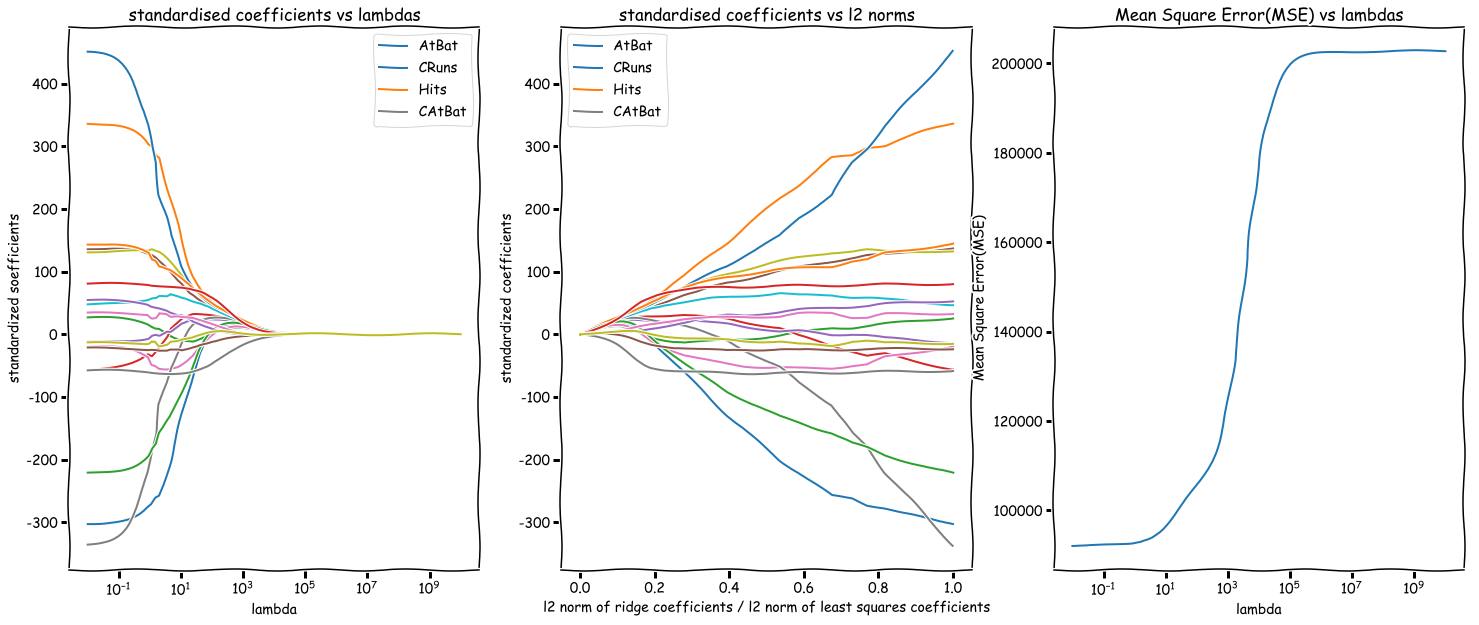

In [69]:
plt.xkcd()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,10))

# indexing the four largest coefficients
idx = np.argpartition(np.abs(coefs[-1]), -4)[-4:]

# standardised coefficients vs lambdas
ax1.plot(lambdas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('lambda')
ax1.set_ylabel('standardized soefficients')
ax1.set_title('standardised coefficients vs lambdas')
ax1.legend(np.array(ax1.get_lines())[ind], X.columns[ind])

# second plot
l2norm = linalg.norm(coefs[-1])
l2coefs = linalg.norm(coefs/l2norm, axis=1)
ax2.plot(l2coefs, coefs)
ax2.set_xlabel('l2 norm of ridge coefficients / l2 norm of least squares coefficients')
ax2.set_ylabel('standardized coefficients')
ax2.set_title('standardised coefficients vs l2 norms')
ax2.legend(np.array(ax2.get_lines())[ind], X.columns[ind]);

# third
ax3.plot(lambdas, MSE)
ax3.set_xscale('log')
ax3.set_xlabel('lambda')
ax3.set_ylabel('Mean Square Error(MSE)')
ax3.set_title('Mean Square Error(MSE) vs lambdas');

### Split dataset into training and test dataset (and standardise them)

In [103]:
from sklearn.model_selection import train_test_split
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [104]:
# standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MSE with only the intercept
lmMSEintercept = np.mean(pow((y_train.mean()-y_test), 2))
print("MSE with only the intercept: ", lmMSEintercept)

# MSE for lambda = 0; this is similar to least squares linear regression
lmridge0 = Ridge(alpha=0, fit_intercept=True, solver='lsqr').fit(X_train_scaled, y_train)
lmpredict0 = lmridge0.predict(X_test_scaled)
lmMSE0 = mean_squared_error(y_test, lmpredict0)
print("MSE at lambda = 0: ", lmMSE0)

# MSE for lambda = 4
lmridge4 = Ridge(alpha=4, fit_intercept=True, solver='lsqr').fit(X_train_scaled, y_train)
lmpredict4 = lmridge4.predict(X_test_scaled)
lmMSE4 = mean_squared_error(y_test, lmpredict4)
print("MSE at lambda = 4: ", lmMSE4)

# MSE for lambda = pow(10, 10)
lmridge1010 = Ridge(alpha=pow(10, 10), fit_intercept=True, solver='lsqr').fit(X_train_scaled, y_train)
lmpredict1010 = lmridge1010.predict(X_test_scaled)
lmMSE1010 = mean_squared_error(y_test, lmpredict1010)
print("MSE at lambda = 10^10: ", lmMSE1010)

for k in range(0, pow(10, 10)):
    lmridgek = Ridge(alpha=k, fit_intercept=True, solver='lsqr').fit(X_train_scaled, y_train)
    lmpredictk = lmridgek.predict(X_test_scaled)
    lmMSEk = mean_squared_error(y_test, lmpredictk)

plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(lmMSEk)

### Ridge regression with cross-validation

In [163]:
# finding the best lambda using CV
from sklearn.linear_model import RidgeCV
lmridgeCV = RidgeCV(alphas=lambdas, cv=10, scoring='neg_mean_squared_error').fit(X_train_scaled, y_train)
print("Best lambda: ", lmridgeCV.alpha_)

Best lambda:  100.0


In [164]:
# performing ridge regression using best lambda
lmridge = Ridge(alpha=lmridgeCValpha, fit_intercept=True, solver='lsqr').fit(X_train_scaled, y_train)
lmridge_MSE = mean_squared_error(y_test, lmridge.predict(X_test_scaled))
print('MSE for best lambda: ', lmridge_MSE)

MSE for best lambda:  152308.5473577816


In [165]:
intercept_list = pd.DataFrame([lmridge.intercept_]*19)
coef_list = pd.concat([intercept_list, pd.DataFrame([lmridge.coef_]).T], axis = 1)
coef_list.reset_index(inplace=True, drop=True)
coef_list.columns = ['Intercept', 'Coefficients']
coef_list

,Intercept,Coefficients
0,542.646863,29.877676
1,542.646863,53.374427
2,542.646863,23.442928
3,542.646863,32.254055
4,542.646863,25.341092
5,542.646863,19.791821
6,542.646863,23.805406
7,542.646863,24.024244
8,542.646863,32.514184
9,542.646863,22.351882


**The main point to note here is that none of the coefficients are zero since ridge regression does not perform variable selection.**